In [1]:
!pip install yfinance ta

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 27.1 MB/s 
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=bde168f1baffcc7e7b87ee1049383892552c2ea5a0ef4c0417a6f39497f95d21
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium=

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from keras.models import load_model
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D
from ta.trend import IchimokuIndicator
from sklearn.linear_model import LinearRegression
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [3]:
#@markdown Select whether you would like to store data in your personal drive.
#@markdown
#@markdown If you select **yes**, you will need to authorize Colab to access
#@markdown your personal drive
#@markdown
#@markdown If you select **no**, then any changes you make will diappear when
#@markdown this Colab's VM restarts after some time of inactivity...
use_gdrive = 'yes'  #@param ["yes", "no"]

if use_gdrive == 'yes':
  from google.colab import drive
  drive.mount('/gdrive')
  root = '/gdrive/My Drive/Colab Notebooks/COMP5513'
  import os
  if not os.path.isdir(root):
    os.mkdir(root)
  os.chdir(root)
  print(f'\nChanged CWD to "{root}"')
else:
  from IPython import display
  display.display(display.HTML(
      '<h1 style="color:red">CHANGES NOT PERSISTED</h1>'))

Mounted at /gdrive

Changed CWD to "/gdrive/My Drive/Colab Notebooks/COMP5513"


In [4]:
model = load_model('lstm-cnn.h5')

In [5]:
symbol = '2800.HK'#'AAPL'#'2800.HK'
stock = yf.Ticker(symbol)
df = stock.history(period="max")
stock_data = df[['Open',  'High',  'Low',  'Close', 'Volume']]

In [6]:
indicator_bollinger = BollingerBands(close=stock_data["Close"], window=20, window_dev=2)
macd = MACD(close=stock_data["Close"])
rsi = RSIIndicator(close=stock_data["Close"])
ichi = IchimokuIndicator(high=stock_data["High"],low=stock_data["Low"])

#get the technical indicators
stock_data['macd'] = macd.macd()
stock_data['macd_signal'] = macd.macd_signal()
stock_data['rsi'] = rsi.rsi()
stock_data['bollinger_mavg'] = indicator_bollinger.bollinger_mavg()
stock_data['bollinger_hband'] = indicator_bollinger.bollinger_hband()
stock_data['bollinger_lbond'] = indicator_bollinger.bollinger_lband()
stock_data['ichimoku_a'] = ichi.ichimoku_a()
stock_data['ichimoku_b'] = ichi.ichimoku_b()
stock_data['ichimoku_base_line'] = ichi.ichimoku_base_line()
stock_data['ichimoku_conversion_line'] = ichi.ichimoku_conversion_line()
stock_data = stock_data.fillna(0)

#stock_data = stock_data[:-1]
stock_orig = stock_data.copy()

#stock = stock[250:]
stock_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Open,High,Low,Close,Volume,macd,macd_signal,rsi,bollinger_mavg,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
Date,,,,,,,,,,,,,,,
2008-01-02,27.730000,27.730000,27.730000,27.730000,0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.730000,0.000000,0.000000
2008-01-03,27.059999,27.059999,27.059999,27.059999,0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.395000,0.000000,0.000000
2008-01-04,27.690001,27.690001,27.690001,27.690001,0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.395000,0.000000,0.000000
2008-01-07,27.350000,27.350000,27.350000,27.350000,0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.395000,0.000000,0.000000
2008-01-08,27.280001,27.280001,27.280001,27.280001,0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,27.395000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,22.900000,22.920000,22.540001,22.879999,150645680,-0.273667,-0.042462,33.375090,24.223,25.591811,22.854189,23.815001,23.850000,23.850000,23.780001
2022-03-01,22.879999,23.059999,22.700001,22.879999,79088077,-0.326408,-0.099251,33.375090,24.171,25.655991,22.686009,23.815001,23.850000,23.850000,23.780001
2022-03-02,22.680000,22.820000,22.420000,22.500000,76953861,-0.394323,-0.158266,29.966192,24.112,25.755626,22.468374,23.725000,23.790000,23.790000,23.660000


In [7]:
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock_data.iloc[:,0:3])
stock_data.iloc[:,0:3] = scaled_values

y_scaler = preprocessing.MinMaxScaler()
scaled_values = y_scaler.fit_transform(np.array(stock_data.iloc[:,3]).reshape(-1,1))
stock_data.iloc[:,3] = scaled_values

scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock_data.iloc[:,4:])
stock_data.iloc[:,4:] = scaled_values

stock_data

,Open,High,Low,Close,Volume,macd,macd_signal,rsi,bollinger_mavg,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
Date,,,,,,,,,,,,,,,
2008-01-02,0.827761,0.729317,0.749538,0.742674,0.000000,0.640635,0.624379,0.000000,0.000000,0.000000,0.000000,0.000000,0.793402,0.000000,0.000000
2008-01-03,0.807761,0.699191,0.718577,0.711996,0.000000,0.640635,0.624379,0.000000,0.000000,0.000000,0.000000,0.000000,0.775284,0.000000,0.000000
2008-01-04,0.826567,0.727518,0.747689,0.740843,0.000000,0.640635,0.624379,0.000000,0.000000,0.000000,0.000000,0.000000,0.775284,0.000000,0.000000
2008-01-07,0.816418,0.712230,0.731978,0.725275,0.000000,0.640635,0.624379,0.000000,0.000000,0.000000,0.000000,0.000000,0.775284,0.000000,0.000000
2008-01-08,0.814328,0.709083,0.728743,0.722070,0.000000,0.640635,0.624379,0.000000,0.000000,0.000000,0.000000,0.000000,0.775284,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,0.683582,0.513040,0.509704,0.520604,0.383986,0.535056,0.606095,0.372515,0.747912,0.741921,0.737307,0.733616,0.583559,0.742991,0.717887
2022-03-01,0.682985,0.519335,0.517098,0.520604,0.201590,0.514709,0.581643,0.372515,0.746306,0.743781,0.731881,0.733616,0.583559,0.742991,0.717887
2022-03-02,0.677015,0.508543,0.504159,0.503205,0.196150,0.488508,0.556232,0.334467,0.744485,0.746670,0.724860,0.730843,0.580314,0.741121,0.714264


In [8]:
stock_final = stock_data.drop(['Open','Volume','bollinger_mavg','ichimoku_conversion_line'],1)

features = 11 #including the close price

window_size = 60
week = 7
X = []
Y = []
print(stock_final)
for i in range(0 , len(stock_data) - window_size , 1):
  X.append(np.array(stock_final.iloc[i:i+window_size,:]).reshape(window_size * features,1))
  Y.append(np.array(stock_data.iloc[i+window_size,3]).reshape(1,1))

train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)
# train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2,shuffle=True)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
# valid_label = np.array(valid_label)
# valid_X = np.array(valid_X)
train_X = train_X.reshape(train_X.shape[0],features,window_size,1)
test_X = test_X.reshape(test_X.shape[0],features,window_size,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


                High       Low     Close      macd  macd_signal       rsi  \
Date                                                                        
2008-01-02  0.729317  0.749538  0.742674  0.640635     0.624379  0.000000   
2008-01-03  0.699191  0.718577  0.711996  0.640635     0.624379  0.000000   
2008-01-04  0.727518  0.747689  0.740843  0.640635     0.624379  0.000000   
2008-01-07  0.712230  0.731978  0.725275  0.640635     0.624379  0.000000   
2008-01-08  0.709083  0.728743  0.722070  0.640635     0.624379  0.000000   
...              ...       ...       ...       ...          ...       ...   
2022-02-28  0.513040  0.509704  0.520604  0.535056     0.606095  0.372515   
2022-03-01  0.519335  0.517098  0.520604  0.514709     0.581643  0.372515   
2022-03-02  0.508543  0.504159  0.503205  0.488508     0.556232  0.334467   
2022-03-03  0.501349  0.507856  0.509615  0.474022     0.532670  0.364910   
2022-03-04  0.478867  0.482902  0.483059  0.446722     0.507727  0.310890   

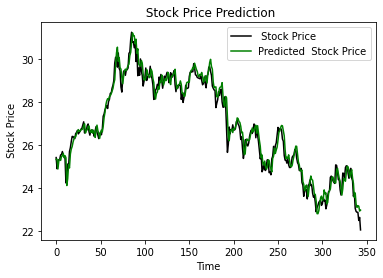

In [9]:
predicted  = model.predict(test_X)

real_price = y_scaler.inverse_transform(test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
predicted = y_scaler.inverse_transform(predicted)
plt.plot(real_price, color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [10]:
len_t = len(test_label)
len_t

344

In [11]:
len(predicted)

344

In [12]:
testing_data = stock_orig.iloc[-len(predicted)-1:,:]

In [13]:
len(testing_data)

345

In [14]:
real_price[0]

array([25.42000008])

In [15]:
testing_data[:]

,Open,High,Low,Close,Volume,macd,macd_signal,rsi,bollinger_mavg,bollinger_hband,bollinger_lbond,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
Date,,,,,,,,,,,,,,,
2020-10-12,25.020000,25.520000,24.980000,25.480000,47534936,-0.112778,-0.238613,59.158967,24.817,25.791414,23.842586,24.855000,25.230000,24.940000,24.770000
2020-10-14,25.559999,25.559999,25.280001,25.420000,49829090,-0.059884,-0.202867,57.873284,24.825,25.816312,23.833688,24.785000,25.230000,24.780000,24.790000
2020-10-15,25.379999,25.379999,24.879999,24.900000,79376147,-0.059242,-0.174142,48.113852,24.800,25.756661,23.843340,24.815000,25.230000,24.780000,24.849999
2020-10-16,25.040001,25.260000,25.000000,25.200001,52032884,-0.034132,-0.146140,53.034571,24.784,25.701876,23.866125,24.885000,25.230000,24.770000,25.000000
2020-10-19,25.299999,25.580000,25.260000,25.320000,54672234,-0.004498,-0.117812,54.877912,24.776,25.672000,23.880000,24.935000,25.230000,24.770000,25.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,22.900000,22.920000,22.540001,22.879999,150645680,-0.273667,-0.042462,33.375090,24.223,25.591811,22.854189,23.815001,23.850000,23.850000,23.780001
2022-03-01,22.879999,23.059999,22.700001,22.879999,79088077,-0.326408,-0.099251,33.375090,24.171,25.655991,22.686009,23.815001,23.850000,23.850000,23.780001
2022-03-02,22.680000,22.820000,22.420000,22.500000,76953861,-0.394323,-0.158266,29.966192,24.112,25.755626,22.468374,23.725000,23.790000,23.790000,23.660000


In [16]:
def rsi_signal(rsi):
  rsi_val = float(rsi)
  if rsi_val >= 70:
    return -1
  if rsi_val <= 30:
    return 1
  else:
    return 0

def predict_signal(current, predict, threshold=0.004):
  diff = (current - predict)/current
  # print(diff)
  if abs(diff) >= threshold:
    if np.sign(diff) > 0:
      return -1
    else:
      return 1
  else:
    return 0

def trade(price, capital, state, stock, rsi, macd, ml, bb, threshold=0.15, min_lot=500):
  remain = 0
  score = rsi*0.2+macd*0.2+bb*0.2+ml*0.4
  #print(score)
  if score > threshold and state != 1:
    lots = math.floor(capital / (price*min_lot))
    amount = price * lots * min_lot
    if lots > 1 and capital > amount:
      remain = capital - amount
    else:
      return None, None, None
    return remain, lots, 1
  elif score <= -0.2 and state != 0:
    values = capital + price * stock * min_lot
    return values, 0, 0
  else:
    return None, None, None

def macd_signal(macd, prev_macd, signal, prev_signal):
  if prev_signal > prev_macd and signal < macd:
    return 1
  elif prev_signal < prev_macd and signal > macd:
    return -1
  else:
    return 0

def bollinger_signal(prev_row, curr_row):
  if prev_row['Close'] < prev_row['bollinger_lbond'] and curr_row['Close'] > curr_row['bollinger_lbond']:
    return 1
  elif prev_row['Close'] > prev_row['bollinger_hband'] and curr_row['Close'] < curr_row['bollinger_hband']:
    return -1
  else:
    return 0

In [17]:
trade(25.4,200000, 0, 0, -1,0,0, 1)

(None, None, None)

In [18]:
money_sequence = []
count = 0
init_capital = 1000000
init_state = 0
init_stock = 0
cash_in_hand = init_capital
p_signal = 0
p_macd = 0
money_sequence.append(cash_in_hand)
for index, row in testing_data.iterrows():
  if count == 0:
    p_signal = row['macd_signal']
    p_macd = row['macd']
    count += 1
    prev_r = row
    continue
  if count < len(predicted)-1:
    rsi_sig = rsi_signal(row['rsi'])
    ml_sig = predict_signal(row['Close'], predicted[count][0])
    macd_sig = macd_signal(row['macd'], p_macd, row['macd_signal'], p_signal)
    bollinger_sig = bollinger_signal(prev_r, row)
    #print(rsi_sig, macd_sig, bollinger_sig, ml_sig, row['Close'], predicted[count][0])
    remain, lots, state = trade(row['Close'],cash_in_hand, init_state, init_stock, rsi_sig,macd_sig,ml_sig,bollinger_sig)
    if (remain != None):
      cash_in_hand = remain
      init_state = state
      init_stock = lots
      print("Trading at: ", index, " long " if init_state == 1 else " short ", row['Close'], cash_in_hand, init_stock)
    if state == 0:
      money_sequence.append(remain)
    p_signal = row['macd_signal']
    p_macd = row['macd']
    count += 1
  prev_r = row

if init_stock > 0:
  market_money = cash_in_hand+row['Close']*init_stock*500
  money_sequence.append(market_money)
money_sequence

Trading at:  2020-11-19 00:00:00  long  26.520000457763672 5499.982833862305 75
Trading at:  2020-11-27 00:00:00  short  27.079999923706055 1020999.9799728394 0
Trading at:  2020-12-08 00:00:00  long  26.459999084472656 2290.01522064209 77
Trading at:  2021-01-12 00:00:00  short  28.399999618530273 1095690.0005340576 0
Trading at:  2021-01-20 00:00:00  long  30.079999923706055 12810.003280639648 72
Trading at:  2021-01-25 00:00:00  short  30.280000686645508 1102890.027999878 0
Trading at:  2021-01-28 00:00:00  long  28.700000762939453 12289.999008178711 76
Trading at:  2021-02-16 00:00:00  short  30.899999618530273 1186489.984512329 0
Trading at:  2021-02-18 00:00:00  long  30.780000686645508 1459.9580764770508 77
Trading at:  2021-03-16 00:00:00  short  29.260000228881836 1127969.9668884277 0
Trading at:  2021-03-19 00:00:00  long  29.18000030517578 4539.955139160156 77
Trading at:  2021-03-26 00:00:00  short  28.559999465942383 1104099.934577942 0
Trading at:  2021-04-12 00:00:00  lo

[1000000,
 1020999.9799728394,
 1095690.0005340576,
 1102890.027999878,
 1186489.984512329,
 1127969.9668884277,
 1104099.934577942,
 1127199.9492645264,
 1157619.9760437012,
 1062029.9730300903,
 1078829.9760818481,
 1090029.9272537231,
 1040009.955406189,
 1092929.965019226,
 1032989.9063110352,
 1038659.9588394165,
 1020029.9959182739,
 1020029.9959182739,
 975510.0183486938,
 1021160.0341796875,
 947210.0439071655]

In [19]:
final_profit = money_sequence[-1]/init_capital - 1
print("final profit is ", final_profit*100,"%")

final profit is  -5.278995609283443 %


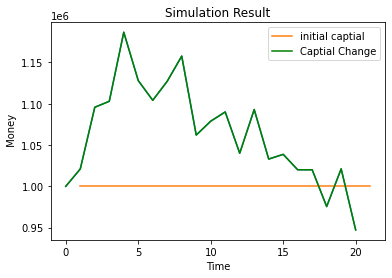

In [23]:
plt.plot(money_sequence)

x_coordinates = [i+1 for i in range(len(money_sequence))]
y_coordinates = [1000000]*len(money_sequence)
plt.plot(x_coordinates, y_coordinates, label = 'initial captial')
plt.plot(money_sequence, color = 'green', label = 'Captial Change')
plt.title('Simulation Result')
plt.xlabel('No. of Trade')
plt.ylabel(' Money')
plt.legend()
plt.show()